In [2]:
# to mount the drive so that we don't need to load dataset manually
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#import pandas  as pd
path='/content/drive/My Drive/mL_project/'
#train=pd.read_csv(path+"training.csv")

In [4]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy.signal import savgol_filter
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Data exploration part**




In [5]:
#train=pd.read_csv(path+"training.csv")
train=pd.read_csv("training.csv")
#train= pd.read_csv("training.csv")
print(train.head())
print('========================================================')
print('shape of the train =',train.shape)
print('========================================================')

# check if sting value in any column
train_check = train.select_dtypes(include=[object])
print(train_check)
print('========================================================')



#checking Depth which has object as its value
print(train['Depth'])

# change string value of Depth column to numeric value by one-hot encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Depth']=le.fit_transform(train['Depth']) #making categorical value 0, 1

print(train['Depth'])
print(train.head())

       PIDN  m7497.96  m7496.04  ...        pH       SOC      Sand
0  XNhoFZW5  0.302553  0.301137  ... -1.129366  0.353258  1.269748
1  9XNspFTd  0.270192  0.268555  ... -1.531538 -0.264023  1.692209
2  WDId41qG  0.317433  0.316265  ... -0.259551  0.064152  2.091835
3  JrrJf1mN  0.261116  0.259767  ... -0.577548 -0.318719  2.118477
4  ZoIitegA  0.260038  0.258425  ... -0.699135 -0.310905  2.164148

[5 rows x 3600 columns]
shape of the train = (1157, 3600)
          PIDN    Depth
0     XNhoFZW5  Topsoil
1     9XNspFTd  Subsoil
2     WDId41qG  Topsoil
3     JrrJf1mN  Subsoil
4     ZoIitegA  Topsoil
...        ...      ...
1152  bdcNNrbi  Topsoil
1153  6HBVKZwh  Subsoil
1154  5eLY5nw7  Topsoil
1155  gsSGXhX6  Subsoil
1156  A6IpBbfZ  Topsoil

[1157 rows x 2 columns]
0       Topsoil
1       Subsoil
2       Topsoil
3       Subsoil
4       Topsoil
         ...   
1152    Topsoil
1153    Subsoil
1154    Topsoil
1155    Subsoil
1156    Topsoil
Name: Depth, Length: 1157, dtype: object
0       1

In [6]:
print(train.isnull())
print('========================================================')
print(train.isnull().any().sum())
print('========================================================')

       PIDN  m7497.96  m7496.04  m7494.11  ...      P     pH    SOC   Sand
0     False     False     False     False  ...  False  False  False  False
1     False     False     False     False  ...  False  False  False  False
2     False     False     False     False  ...  False  False  False  False
3     False     False     False     False  ...  False  False  False  False
4     False     False     False     False  ...  False  False  False  False
...     ...       ...       ...       ...  ...    ...    ...    ...    ...
1152  False     False     False     False  ...  False  False  False  False
1153  False     False     False     False  ...  False  False  False  False
1154  False     False     False     False  ...  False  False  False  False
1155  False     False     False     False  ...  False  False  False  False
1156  False     False     False     False  ...  False  False  False  False

[1157 rows x 3600 columns]
0


In [8]:
#test_file=pd.read_csv(path +"sorted_test.csv")
#test_file=pd.read_csv("sorted_test.csv")
#print(test_file)
#print('========================================================')
#print('========================================================')
#print('========================================================')
#print(test_file.isnull().any().sum())
#print('========================================================')

In [ ]:
 #train.columns

#print(columns_name)



In [ ]:
#train.columns[-40:]

In [9]:
spectral_ir= train.loc[:,'m7488.32':'m599.76']
spatial = train.loc[:,'BSAN':'Depth']
our_targets = train.loc[:,'Ca':'Sand']

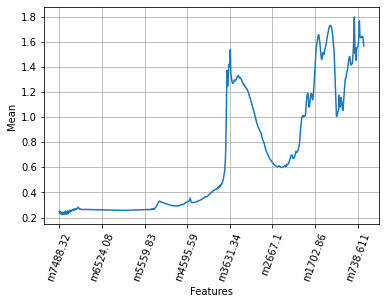

In [10]:
spectral_ir.mean(axis=0).plot()
plot.xticks(rotation=70)
plot.xlabel("Features")
plot.ylabel("Mean")
plot.grid(True)

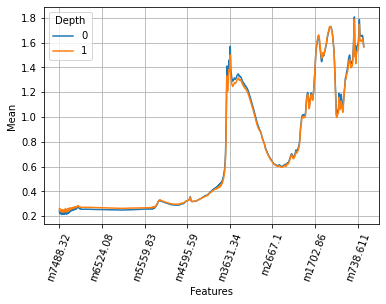

In [11]:
spectral_ir.groupby(by= spatial['Depth']).agg(np.mean).T.plot()
plot.xticks(rotation=70)
plot.xlabel("Features")
plot.ylabel("Mean")
plot.grid(True)

In [ ]:
#sample["PIDN"]=train["PIDN"].astype(str)
#print(sample["PIDN"])


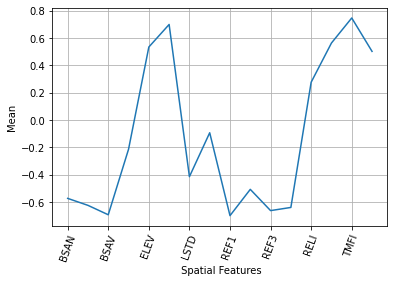

In [12]:
spatial.mean(axis=0).plot()
plot.xticks(rotation=70)
plot.xlabel(" Spatial Features")
plot.ylabel("Mean")
plot.grid(True)

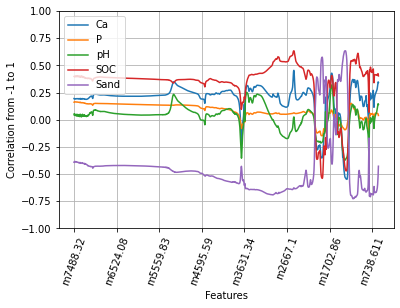

In [13]:
figure = plot.figure()
for (i, j) in our_targets.iteritems():
    spectral_ir.corrwith(j, axis=0).plot(ylim=[-1,1],label=i) # correlation coeffiecnts quantify the association between the variables  or features of a dataset

plot.gca().legend()
plot.xticks(rotation=70)
plot.xlabel("Features")
plot.ylabel("Correlation from -1 to 1")
plot.grid(True)



In [17]:
sample=train[  'PIDN']

 **Savitzky-Golay smoothed NIR**

 

In [18]:
#Running Polinomial Smoother (Savitzky-Golay filtering)
 
smooth_train =train.drop(train.loc[:, 'm2379.76':'m2352.76'].columns, axis = 1)  # co2 drops columns
#print(smooth_train)
 
 
#smoothening of dataset using savgol filter
spectral= [m for m in list(smooth_train.columns) if m[0]=='m'] #interested in seeing the effects of smoothing on the spectra we will left the parameter “m” which declares the derivative to 0.
smoothed_0dg = savgol_filter(smooth_train[spectral], window_length = 11, polyorder = 3, deriv=0) #running poliamial smoother 
smooth_train1=pd.DataFrame(smoothed_0dg,columns=spectral)
smooth_train[spectral]=smooth_train1
print(smooth_train)

          PIDN  m7497.96  m7496.04  ...        pH       SOC      Sand
0     XNhoFZW5  0.301513  0.301539  ... -1.129366  0.353258  1.269748
1     9XNspFTd  0.268987  0.269024  ... -1.531538 -0.264023  1.692209
2     WDId41qG  0.316699  0.316478  ... -0.259551  0.064152  2.091835
3     JrrJf1mN  0.260160  0.260095  ... -0.577548 -0.318719  2.118477
4     ZoIitegA  0.259105  0.258631  ... -0.699135 -0.310905  2.164148
...        ...       ...       ...  ...       ...       ...       ...
1152  bdcNNrbi  0.202765  0.202041  ... -0.895545  3.056795 -0.971962
1153  6HBVKZwh  0.177548  0.177116  ... -0.727194  2.838012 -0.983380
1154  5eLY5nw7  0.142161  0.142008  ... -0.409197  4.369495 -0.404874
1155  gsSGXhX6  0.086987  0.086703  ... -0.194081  2.533278 -0.568530
1156  A6IpBbfZ  0.466819  0.467130  ... -0.549490  3.970996 -0.420098

[1157 rows x 3585 columns]


In [19]:
infrared= smooth_train.loc[:,'m7488.32':'m599.76']
non_infrared = smooth_train.loc[:,'BSAN':'Depth']
our_targets_smooth = smooth_train.loc[:,'Ca':'Sand'] #true Labels

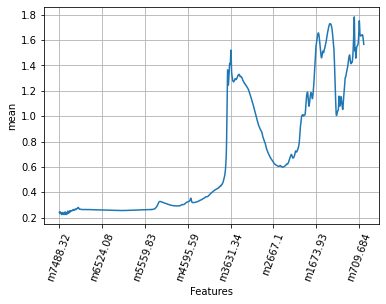

In [20]:
infrared.mean(axis=0).plot()
plot.xticks(rotation=70)
plot.xlabel("Features")
plot.ylabel("mean")
plot.grid(True)

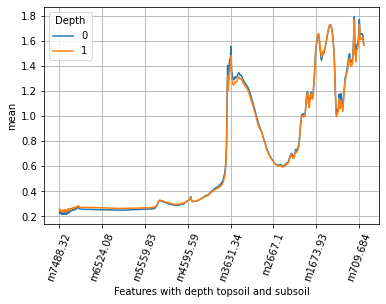

In [21]:
infrared.groupby(by= non_infrared['Depth']).agg(np.mean).T.plot()
plot.xticks(rotation=70)
plot.xlabel("Features with depth topsoil and subsoil")
plot.ylabel("mean")
plot.grid(True)

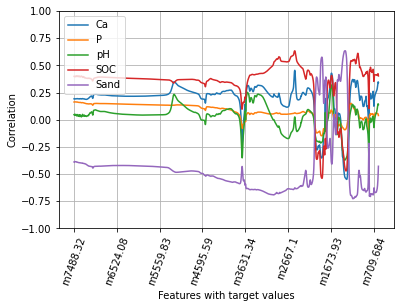

In [22]:
figure = plot.figure()
for (i, j) in our_targets_smooth.iteritems():
    infrared.corrwith(j, axis=0).plot(ylim=[-1,1],label=i) #to see the correlation between the targets values
plot.gca().legend()
plot.xticks(rotation=70)
plot.xlabel("Features with target values")
plot.ylabel("Correlation")
plot.grid(True)


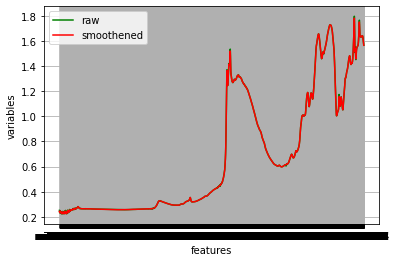

In [ ]:
# signal plot for raw and after smoothened part
raw = train.loc[:,'m7488.32':'m599.76']
smooth= smooth_train.loc[:,'m7488.32':'m599.76']
plot.plot(raw.mean(axis=0), color='green',label="raw")
plot.plot(smooth.mean(axis=0), color='red', label="smoothened")
plot.xlabel('features')
plot.ylabel('variables')
plot.legend(loc="upper left")
plot.grid()
plot.show()


**First derivatives**


In [23]:
train_smooth_1stderiv=smooth_train
smoothed_1dg = savgol_filter(train_smooth_1stderiv[spectral], window_length = 11, polyorder = 3, deriv=1) #running poliamial smoother with deravatives 1
smooth_train1=pd.DataFrame(smoothed_1dg,columns=spectral)
train_smooth_1stderiv[spectral]=smooth_train1
print(train_smooth_1stderiv)

          PIDN  m7497.96  m7496.04  ...        pH       SOC      Sand
0     XNhoFZW5  0.000435  0.000200  ... -1.129366  0.353258  1.269748
1     9XNspFTd  0.000366  0.000253  ... -1.531538 -0.264023  1.692209
2     WDId41qG  0.000021 -0.000066  ... -0.259551  0.064152  2.091835
3     JrrJf1mN  0.000260  0.000139  ... -0.577548 -0.318719  2.118477
4     ZoIitegA -0.000190 -0.000169  ... -0.699135 -0.310905  2.164148
...        ...       ...       ...  ...       ...       ...       ...
1152  bdcNNrbi  0.000969  0.000270  ... -0.895545  3.056795 -0.971962
1153  6HBVKZwh  0.001375  0.000483  ... -0.727194  2.838012 -0.983380
1154  5eLY5nw7  0.001527  0.000653  ... -0.409197  4.369495 -0.404874
1155  gsSGXhX6  0.001447  0.000591  ... -0.194081  2.533278 -0.568530
1156  A6IpBbfZ  0.001999  0.000908  ... -0.549490  3.970996 -0.420098

[1157 rows x 3585 columns]


In [24]:
infrared_1deriv= train_smooth_1stderiv.loc[:,'m7488.32':'m599.76']
non_infrared_1deriv= train_smooth_1stderiv.loc[:,'BSAN':'Depth']
our_targets_1deriv= train_smooth_1stderiv.loc[:,'Ca':'Sand']

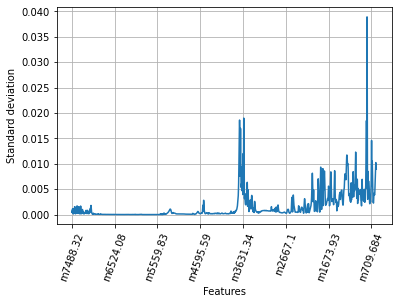

In [25]:
infrared_1deriv.std(axis=0).plot()
plot.xticks(rotation=70)
plot.xlabel("Features")
plot.ylabel("Standard deviation")
plot.grid(True)

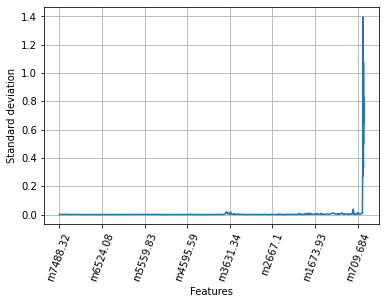

In [26]:
train_smooth_1stderiv.loc[:,'m7488.32':'Depth'].std(axis=0).plot() # standard deviation visualization after smoothing
plot.xticks(rotation=70)
plot.xlabel("Features")
plot.ylabel("Standard deviation")
plot.grid(True)

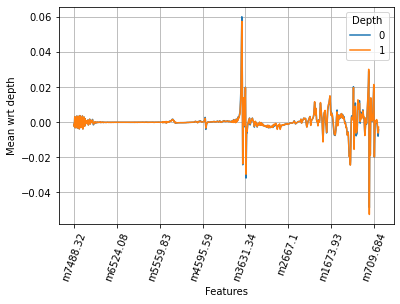

In [ ]:
infrared_1deriv.groupby(by= non_infrared['Depth']).agg(np.mean).T.plot()
plot.xticks(rotation=70)
plot.xlabel("Features")
plot.ylabel("Mean wrt depth")
plot.grid(True)

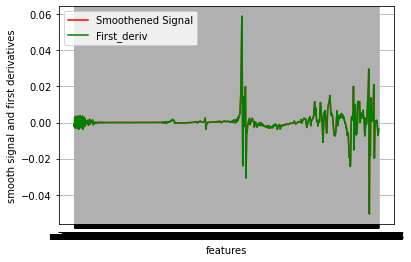

In [ ]:
 #signal plot  after smoothened part and first derivatives
s= smooth_train.loc[:,'m7488.32':'m599.76']
first_deriv= train_smooth_1stderiv.loc[:,'m7488.32':'m599.76']
plot.plot(s.mean(axis=0), color='red', label="Smoothened Signal")
plot.plot(first_deriv.mean(axis=0), color='green', label="First_deriv" )
plot.xlabel('features')
plot.ylabel('smooth signal and first derivatives')
plot.legend(loc="upper left")
plot.grid()
plot.show()

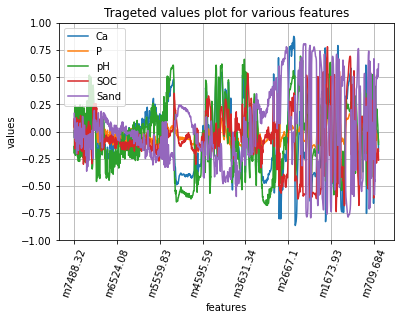

In [ ]:
figure = plot.figure()
for (i, j) in our_targets_1deriv.iteritems():
    infrared_1deriv.corrwith(j, axis=0).plot(ylim=[-1,1],label=i) # help to determine the similar feature
plot.gca().legend()
plot.xticks(rotation=70)
plot.xlabel('features')
plot.ylabel('values')
plot.title("Trageted values plot for various features")
plot.grid(True)

In [ ]:
 del train_smooth_1stderiv["PIDN"]



To view all the mean and standard deviation as columnwise for featureas and target values

In [ ]:
train_smooth_1stderiv.describe()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,...,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.001704,0.001015,0.000388,-0.000177,-0.000681,-0.001123,-0.002048,-0.002417,-0.001898,-0.000637,...,-0.638464,0.276786,0.563194,0.746303,0.502161,0.006442,-0.014524,-0.028543,0.080414,-0.012646
std,0.001785,0.001096,0.000574,0.000323,0.000415,0.000546,0.000690,0.000740,0.000605,0.000403,...,0.326460,1.074667,0.649622,0.825242,0.500212,1.070541,0.995469,0.920224,1.141989,0.988520
min,-0.000485,-0.000370,-0.000429,-0.001194,-0.002323,-0.002998,-0.003874,-0.004635,-0.003914,-0.002066,...,-1.115423,-0.639823,-0.670742,-0.862741,0.000000,-0.535828,-0.418309,-1.886946,-0.857863,-1.493378
25%,0.000942,0.000507,0.000046,-0.000407,-0.000947,-0.001379,-0.002455,-0.002906,-0.002197,-0.000853,...,-0.881048,-0.452939,0.190708,0.056843,0.000000,-0.451077,-0.345681,-0.717841,-0.615639,-0.899649
50%,0.001221,0.000721,0.000305,-0.000109,-0.000612,-0.001043,-0.001986,-0.002378,-0.001861,-0.000594,...,-0.740423,-0.130139,0.316667,0.729111,1.000000,-0.348682,-0.269595,-0.175376,-0.349974,-0.134651
75%,0.001576,0.001006,0.000522,0.000062,-0.000348,-0.000712,-0.001546,-0.001937,-0.001537,-0.000364,...,-0.432460,0.532450,0.955935,1.414215,1.000000,-0.042654,-0.089755,0.376442,0.275121,0.786391
max,0.009479,0.005830,0.002784,0.000507,0.000025,-0.000112,-0.000273,-0.000363,-0.000302,0.000962,...,0.290323,5.612300,2.161892,2.976315,1.000000,9.645815,13.266841,3.416117,7.619989,2.251685


In [ ]:
our_targets_1deriv.describe()


,Ca,P,pH,SOC,Sand
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.006442,-0.014524,-0.028543,0.080414,-0.012646
std,1.070541,0.995469,0.920224,1.141989,0.988520
min,-0.535828,-0.418309,-1.886946,-0.857863,-1.493378
25%,-0.451077,-0.345681,-0.717841,-0.615639,-0.899649
50%,-0.348682,-0.269595,-0.175376,-0.349974,-0.134651
75%,-0.042654,-0.089755,0.376442,0.275121,0.786391
max,9.645815,13.266841,3.416117,7.619989,2.251685


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3dc16970>,
      dtype=object)

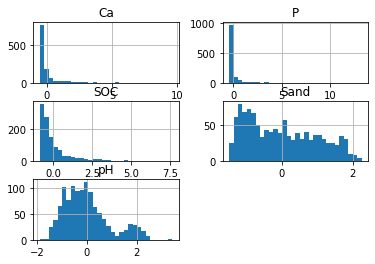

In [ ]:
our_targets_1deriv.hist(bins=30)

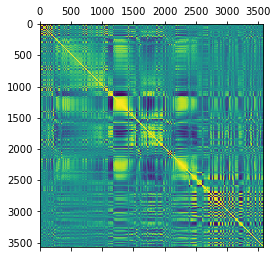

In [ ]:
correlation_matrix= train_smooth_1stderiv.loc[:,'m7488.32':'Depth'].corr()
plot.matshow(correlation_matrix)
#plot.pcolor(correlation_matrix)
plot.show()

In [ ]:
print(correlation_matrix)

          m7488.32  m7486.39  m7484.46  m7482.54  m7480.61  m7478.68  \
m7488.32  1.000000  0.893106  0.678833  0.383519 -0.280559 -0.790791   
m7486.39  0.893106  1.000000  0.935568  0.750408  0.110876 -0.743259   
m7484.46  0.678833  0.935568  1.000000  0.932453  0.413710 -0.586461   
m7482.54  0.383519  0.750408  0.932453  1.000000  0.705118 -0.294351   
m7480.61 -0.280559  0.110876  0.413710  0.705118  1.000000  0.464271   
...            ...       ...       ...       ...       ...       ...   
REF7     -0.365581 -0.356541 -0.292233 -0.184154  0.091894  0.335430   
RELI     -0.001379  0.103343  0.161055  0.201388  0.200852  0.025372   
TMAP      0.173621  0.269745  0.302425  0.293757  0.151756 -0.157284   
TMFI     -0.035960  0.084588  0.170455  0.237516  0.259653  0.046174   
Depth     0.003158  0.015639  0.020080  0.017601 -0.002409 -0.028545   

          m7476.75  m7474.82  m7472.89  m7470.97  ...      LSTD      LSTN  \
m7488.32 -0.735714 -0.640004 -0.517334 -0.235318  ... -0.3

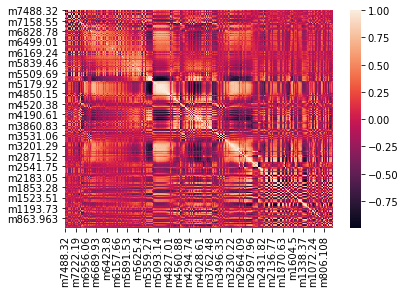

In [ ]:
#to see the similarities between the 
sns.heatmap(correlation_matrix)

In [ ]:
print(correlation_matrix)

          m7488.32  m7486.39  m7484.46  m7482.54  m7480.61  m7478.68  \
m7488.32  1.000000  0.893106  0.678833  0.383519 -0.280559 -0.790791   
m7486.39  0.893106  1.000000  0.935568  0.750408  0.110876 -0.743259   
m7484.46  0.678833  0.935568  1.000000  0.932453  0.413710 -0.586461   
m7482.54  0.383519  0.750408  0.932453  1.000000  0.705118 -0.294351   
m7480.61 -0.280559  0.110876  0.413710  0.705118  1.000000  0.464271   
...            ...       ...       ...       ...       ...       ...   
REF7     -0.365581 -0.356541 -0.292233 -0.184154  0.091894  0.335430   
RELI     -0.001379  0.103343  0.161055  0.201388  0.200852  0.025372   
TMAP      0.173621  0.269745  0.302425  0.293757  0.151756 -0.157284   
TMFI     -0.035960  0.084588  0.170455  0.237516  0.259653  0.046174   
Depth     0.003158  0.015639  0.020080  0.017601 -0.002409 -0.028545   

          m7476.75  m7474.82  m7472.89  m7470.97  ...      LSTD      LSTN  \
m7488.32 -0.735714 -0.640004 -0.517334 -0.235318  ... -0.3

**Model training without feature reduction process(1st approach)**

In [ ]:
X=train_smooth_1stderiv.loc[:,'m7488.32':'Depth']

In [ ]:
# five true labels
y = []
for i in range(5):
   y.append (our_targets_1deriv.iloc[:, i])

**function for four models and for five target variable**

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor



def Svr_func(x_data, y):
  # making three svr models
  svr_rbf = SVR(kernel='rbf', C =1000, gamma=0.1, epsilon=0.1)
  svr_lin = SVR(kernel= 'linear', C=1000, gamma= 'auto')
  svr_poly =  SVR(kernel= 'poly', C=1000, gamma = 'auto', degree=3, epsilon=0.1, coef0=1)
  rand_forest = RandomForestRegressor()
  
  model = [svr_rbf, svr_lin, svr_poly, rand_forest]

  # data split
  x_train, x_val, y_train, y_val = train_test_split(x_data, y, test_size = 0.2, random_state = 5)
  
  
  # scale the data to be in a range
  scalar = StandardScaler()
  scalar.fit(x_train)
  x_train = scalar.transform(x_train)
  x_val = scalar.transform(x_val)

  score, mse = [0,0,0,0], [0,0,0,0] 
  # training
  for i in range(4):
    model[i].fit(x_train, y_train)
    score[i] = model[i].score(x_val, y_val) # returns the R^2 of the prediction
    y_pred1 = model[i].predict(x_val)
    mse[i] = metrics.mean_squared_error(y_val, y_pred1)
    print(f'{str(model[i])} completed')
  
  return score, mse, model




In [ ]:
chemical = ["Ca", "P", "pH", "SOC", "Sand"]
score_r_collect, mse_r_collect, model_r_collect = [], [], []
for i in range(5): # [Ca, P, pH, SOC, Sand]
  score_r, mse_r, model_r = Svr_func(X, y[i])
  score_r_collect.append(score_r)
  mse_r_collect.append(mse_r)
  model_r_collect.append(model_r)
  print(f'{chemical[i]} score = {score_r}, mse = {mse_r} ')

#print(score_r_collect)
#print(mse_r_collect)


Ca score = [-0.0011896920471456962, 0.8527606889691779, 0.914560980492636, 0.900986808808452], mse = [1.3481285915638646, 0.1982616546889785, 0.11504591582195021, 0.1333238996042516] 
P score = [-0.00486828898455971, -3.1065647197415034, -0.006941954757839319, 0.16602919878197842], mse = [0.577267413985773, 2.3591012096977555, 0.5784586742648904, 0.47909181037572557] 
pH score = [-0.0031987357563643126, 0.5587824163499348, 0.8517050496934601, 0.7601958918333214], mse = [0.8264835509950833, 0.363496346535605, 0.12217253945359251, 0.1975622015824977] 
SOC score = [-0.0015125016636328148, 0.8782676815788957, 0.9200525391457907, 0.8974386345726514], mse = [1.5055434251994146, 0.1829965091087092, 0.12018259767152456, 0.15417739583093037] 
Sand score = [-0.00979167272462278, 0.730853295387621, 0.9007849507073225, 0.9135895318589686], mse = [1.0869278549799837, 0.28970634064541634, 0.10679390969669048, 0.09301120946157827] 


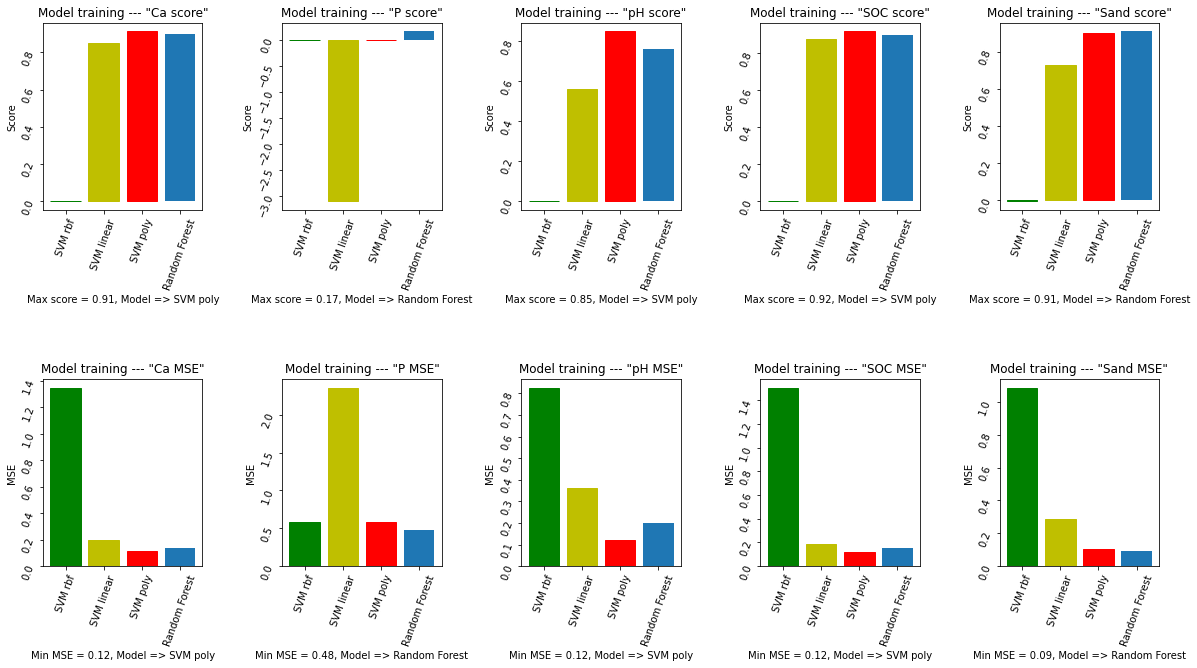

In [ ]:
import matplotlib.pyplot as plt

#========== plot score ================
chemical = ["Ca", "P", "pH", "SOC", "Sand"]

fig, b = plt.subplots(2,5, figsize=(20,10))
fig.subplots_adjust(hspace=0.9, wspace = 0.5)
x = ["SVM rbf", "SVM linear", "SVM poly", "Random Forest"]
for i in range(5):
  max_score = max(score_r_collect[i])
  idx_max_score = score_r_collect[i].index(max_score)
  low_mse =  min(mse_r_collect[i])
  idx_low_mse = mse_r_collect[i].index(low_mse)

  bar_first = b[0,i].bar(x, score_r_collect[i])
  bar_first[0].set_color('g')
  bar_first[1].set_color('y')
  bar_first[2].set_color('r')
  b[0,i].tick_params(labelrotation=70)


  b[0,i].set_xlabel(f'Max score = {max_score:.2f}, Model => {x[idx_max_score]}')
  b[0,i].set_ylabel("Score")
  b[0,i].set_title(f'Model training --- "{chemical[i]} score"')
  #----------------------------------------------------
  bar_second = b[1,i].bar(x, mse_r_collect[i])
  bar_second[0].set_color('g')
  bar_second[1].set_color('y')
  bar_second[2].set_color('r')
  b[1,i].tick_params(labelrotation=70)


  b[1,i].set_xlabel(f'Min MSE = {low_mse:.2f}, Model => {x[idx_low_mse]}')
  b[1,i].set_ylabel("MSE")
  b[1,i].set_title(f'Model training --- "{chemical[i]} MSE"')


**Models after Feature Selection by using Correlation(2nd approach)**


In [ ]:
cor_df = correlation_matrix.abs()
#creating applying  mask for correlation
mask= np.triu(np.ones_like(cor_df, dtype=bool))
train_df = correlation_matrix.mask(mask)

# to drop
train_drop= [ x for x in train_df.columns if any(train_df[x] >0.95)]



In [ ]:
reduce_train =train_smooth_1stderiv.drop(train_drop, axis=1)
#print(reduce_train)
x_data= reduce_train # reduce features by 684 columns,actual 3574
print(x_data)

#train_smooth_1stderiv.loc[:,'m7488.32':'Depth']

      m7497.96  m7496.04  m7494.11  m7492.18  m7490.25  m7488.32  m7486.39  \
0     0.000435  0.000200 -0.000005 -0.000179 -0.000323 -0.000436 -0.000673   
1     0.000366  0.000253  0.000136  0.000014 -0.000112 -0.000244 -0.000560   
2     0.000021 -0.000066 -0.000150 -0.000229 -0.000306 -0.000379 -0.000574   
3     0.000260  0.000139  0.000021 -0.000094 -0.000207 -0.000317 -0.000577   
4    -0.000190 -0.000169 -0.000164 -0.000175 -0.000203 -0.000248 -0.000476   
...        ...       ...       ...       ...       ...       ...       ...   
1152  0.000969  0.000270 -0.000352 -0.000897 -0.001364 -0.001754 -0.002784   
1153  0.001375  0.000483 -0.000294 -0.000957 -0.001506 -0.001939 -0.002972   
1154  0.001527  0.000653 -0.000114 -0.000772 -0.001322 -0.001763 -0.002764   
1155  0.001447  0.000591 -0.000161 -0.000807 -0.001349 -0.001786 -0.002819   
1156  0.001999  0.000908 -0.000015 -0.000770 -0.001359 -0.001779 -0.002621   

      m7484.46  m7482.54  m7480.61  ...      REF7      RELI    

In [ ]:
# five true labels
y = []
for i in range(5):
   y.append (our_targets_1deriv.iloc[:, i])

In [ ]:
score_r_collect1, mse_r_collect1, model_r_collect1 = [], [], []
for i in range(5): # [Ca, P, pH, SOC, Sand]
  score_r, mse_r, model_r = Svr_func(x_data, y[i])
  score_r_collect1.append(score_r)
  mse_r_collect1.append(mse_r)
  model_r_collect1.append(model_r)
  print(f'{chemical[i]} score = {score_r}, mse = {mse_r} ')

#print(score_r_collect1)
#print(mse_r_collect1)




Ca score = [-0.0011896900312207137, 0.9901363793031008, 0.9437125240775148, 0.9797858384823459], mse = [1.348128588849368, 0.013281628030589765, 0.07579258580150416, 0.02721890697927421] 
P score = [-0.0048682882366288815, 0.98857145350714, 0.8278482605700763, 0.961804677249418], mse = [0.5772674135561087, 0.006565365383572958, 0.09889613447180005, 0.021942094732496052] 
pH score = [-0.003198729104062048, 0.988046021146693, 0.8873393445204809, 0.9996715329593963], mse = [0.8264835455145957, 0.009848264894146242, 0.0928152870208159, 0.00027060700579769833] 
SOC score = [-0.0015124960861829795, 0.9930957574042871, 0.9116565636138436, 0.9936599425995193], mse = [1.505543416815003, 0.010378938883628968, 0.13280401351931548, 0.009530816359081774] 
Sand score = [-0.009791651293912018, 0.9904116625304202, 0.9322124697716518, 0.999802195911546], mse = [1.0869278319122193, 0.010320773442817508, 0.07296569858482327, 0.00021291398946633651] 


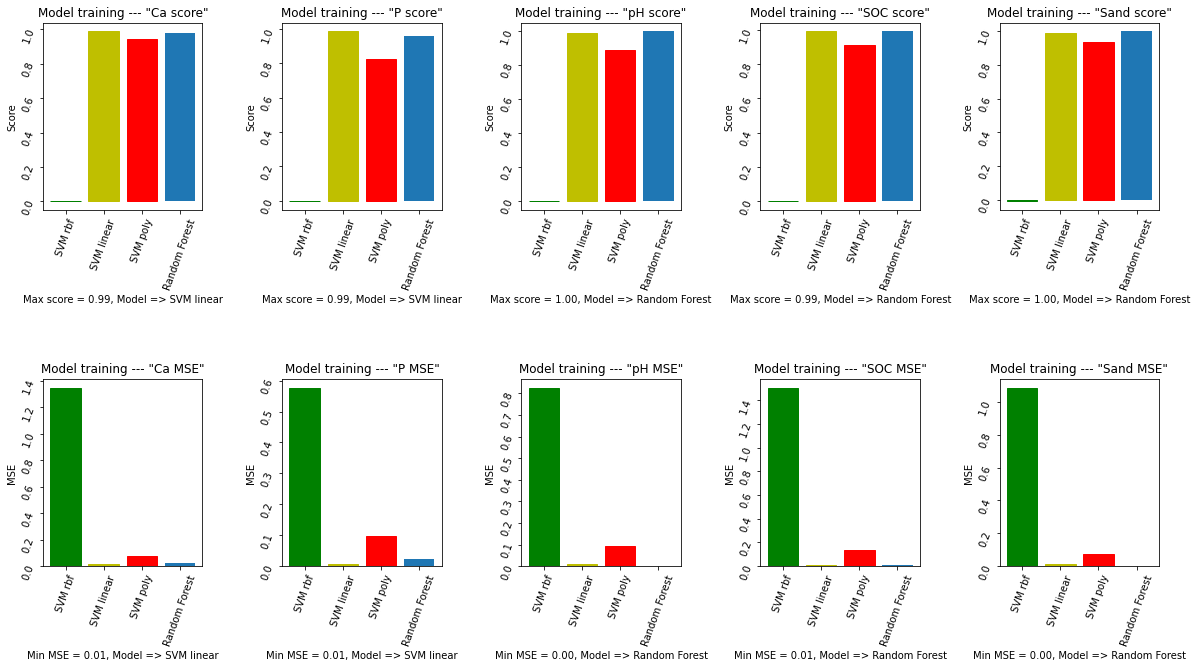

In [ ]:
import matplotlib.pyplot as plt

#========== plot score ================
chemical = ["Ca", "P", "pH", "SOC", "Sand"]

fig, b = plt.subplots(2,5, figsize=(20,10))
fig.subplots_adjust(hspace=0.9, wspace = 0.5)
x = ["SVM rbf", "SVM linear", "SVM poly", "Random Forest"]
for i in range(5):
  max_score = max(score_r_collect1[i])
  idx_max_score = score_r_collect1[i].index(max_score)
  low_mse =  min(mse_r_collect1[i])
  idx_low_mse = mse_r_collect1[i].index(low_mse)

  bar_first = b[0,i].bar(x, score_r_collect1[i])
  bar_first[0].set_color('g')
  bar_first[1].set_color('y')
  bar_first[2].set_color('r')
  b[0,i].tick_params(labelrotation=70)


  b[0,i].set_xlabel(f'Max score = {max_score:.2f}, Model => {x[idx_max_score]}')
  b[0,i].set_ylabel("Score")
  b[0,i].set_title(f'Model training --- "{chemical[i]} score"')
  #----------------------------------------------------
  bar_second = b[1,i].bar(x, mse_r_collect1[i])
  bar_second[0].set_color('g')
  bar_second[1].set_color('y')
  bar_second[2].set_color('r')
  b[1,i].tick_params(labelrotation=70)


  b[1,i].set_xlabel(f'Min MSE = {low_mse:.2f}, Model => {x[idx_low_mse]}')
  b[1,i].set_ylabel("MSE")
  b[1,i].set_title(f'Model training --- "{chemical[i]} MSE"')




**Models after Feature selection by using standard deviation(Third approach)**


In [ ]:
train_df=train_smooth_1stderiv.loc[:,'m7488.32':'Depth'] #taking the features only

In [ ]:
#del train_smooth_1stderiv["PIDN"]

same_features= [ f for f in train_df.columns if train_smooth_1stderiv[f].std() < 0.002]
train_df.drop(labels= same_features, axis=1, inplace= True)
#print(X.shape)
#print(train_smooth_1stderiv)
X_fstd=train_df
print(X_fstd)


      m4522.31  m4520.38  m4518.45  m4516.52  m4514.59  m3754.77  m3752.84  \
0    -0.005104 -0.005385 -0.005301 -0.004939 -0.004409  0.007423  0.007960   
1    -0.006889 -0.007240 -0.007110 -0.006622 -0.005917  0.009077  0.009767   
2    -0.002797 -0.003139 -0.003205 -0.003042 -0.002724  0.005038  0.005308   
3    -0.003316 -0.003709 -0.003782 -0.003591 -0.003222  0.005406  0.005735   
4    -0.003542 -0.003885 -0.003919 -0.003700 -0.003317  0.005499  0.005825   
...        ...       ...       ...       ...       ...       ...       ...   
1152 -0.000474 -0.000492 -0.000473 -0.000429 -0.000377  0.001937  0.001748   
1153 -0.000505 -0.000538 -0.000529 -0.000489 -0.000431  0.002185  0.001992   
1154 -0.000081 -0.000081 -0.000061 -0.000030  0.000005  0.002412  0.002353   
1155  0.000062  0.000063  0.000088  0.000126  0.000168  0.002915  0.002887   
1156 -0.000129 -0.000117 -0.000096 -0.000074 -0.000056  0.000880  0.000757   

      m3750.91  m3748.98  m3747.05  ...      LSTD      LSTN    

In [ ]:
#X_fstd.columns
X_train = X_fstd
#print(X_train)


In [ ]:
# five true labels
y = []
for i in range(5):
   y.append (our_targets_1deriv.iloc[:, i])

In [ ]:
def Svr_func1(x_data, y):
  # making three svr models
  svr_rbf = SVR(kernel='rbf', C =100, gamma=0.1, epsilon=0.1)
  svr_lin = SVR(kernel= 'linear', C=100, gamma= 'auto')
  svr_poly =  SVR(kernel= 'poly', C=100, gamma = 'auto', degree=3, epsilon=0.1, coef0=1)
  rand_forest = RandomForestRegressor(n_estimators = 30)
  
  model = [svr_rbf, svr_lin, svr_poly, rand_forest]

  # data split
  x_train, x_val, y_train, y_val = train_test_split(x_data, y, test_size = 0.2, random_state = 5)
  
  
  # scale the data to be in a range
  scalar = StandardScaler()
  scalar.fit(x_train)
  x_train = scalar.transform(x_train)
  x_val = scalar.transform(x_val)

  score, mse = [0,0,0,0], [0,0,0,0] 
  # training
  for i in range(4):
    model[i].fit(x_train, y_train)
    score[i] = model[i].score(x_val, y_val) # returns the R^2 of the prediction
    y_pred1 = model[i].predict(x_val)
    mse[i] = metrics.mean_squared_error(y_val, y_pred1)
    print(f'{str(model[i])} completed')
  
  return score, mse, model





score_r_collect2, mse_r_collect2, model_r_collect2 = [], [], []
for i in range(5): # [Ca, P, pH, SOC, Sand]
  score_r, mse_r, model_r = Svr_func1(X_train, y[i])
  score_r_collect2.append(score_r)
  mse_r_collect2.append(mse_r)
  model_r_collect2.append(model_r)
  print(f'{chemical[i]} score = {score_r}, mse = {mse_r} ')

#print(score_r_collect2)
#print(mse_r_collect2)






SVR(C=100, gamma=0.1) completed
SVR(C=100, gamma='auto', kernel='linear') completed
SVR(C=100, coef0=1, gamma='auto', kernel='poly') completed
RandomForestRegressor(n_estimators=30) completed
Ca score = [0.059791264831765445, 0.8927097373036776, 0.858510064042334, 0.9037773855121906], mse = [1.266016108622408, 0.14446919688272114, 0.19051996799232673, 0.12956631373301716] 
SVR(C=100, gamma=0.1) completed
SVR(C=100, gamma='auto', kernel='linear') completed
SVR(C=100, coef0=1, gamma='auto', kernel='poly') completed
RandomForestRegressor(n_estimators=30) completed
P score = [0.10548189858586754, 0.12676844796183906, -1.957391260895966, 0.07464182510180639], mse = [0.513874461785045, 0.5016459623432278, 1.6989347002348991, 0.5315911811426292] 
SVR(C=100, gamma=0.1) completed
SVR(C=100, gamma='auto', kernel='linear') completed
SVR(C=100, coef0=1, gamma='auto', kernel='poly') completed
RandomForestRegressor(n_estimators=30) completed
pH score = [0.0379640661716939, 0.8046453767916388, 0.8385

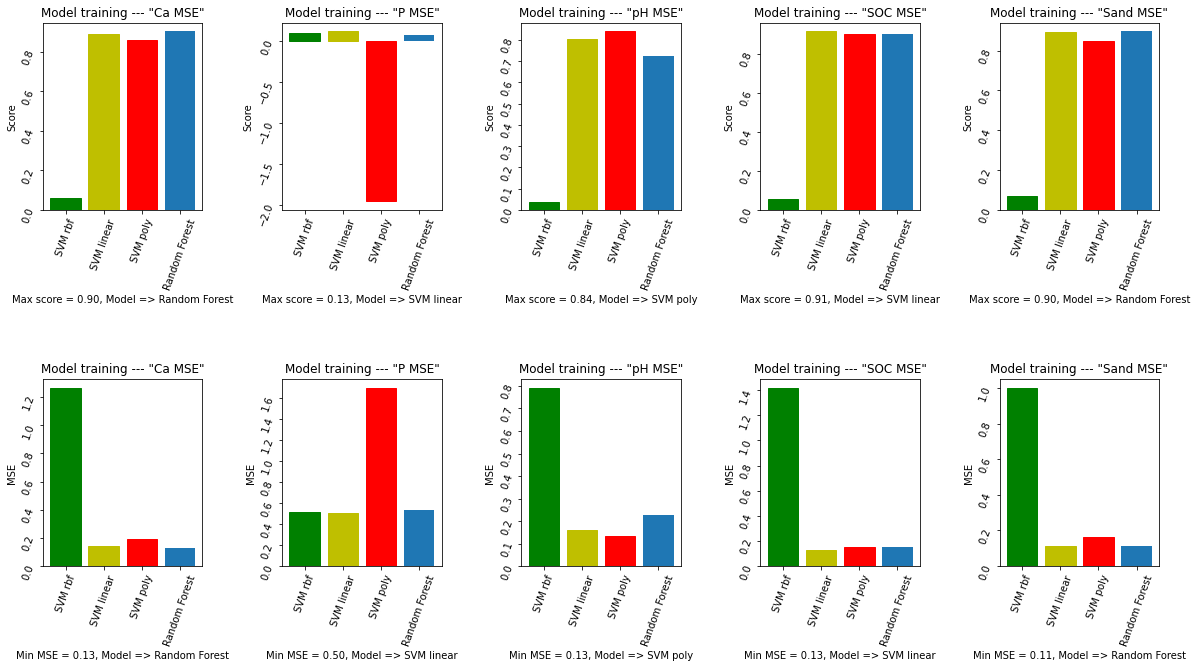

In [ ]:
import matplotlib.pyplot as plt

#========== plot score ================
chemical = ["Ca", "P", "pH", "SOC", "Sand"]

fig, b = plt.subplots(2,5, figsize=(20,10))
fig.subplots_adjust(hspace=0.9, wspace = 0.5)
x = ["SVM rbf", "SVM linear", "SVM poly", "Random Forest"]
for i in range(5):
  max_score = max(score_r_collect2[i])
  idx_max_score = score_r_collect2[i].index(max_score)
  low_mse =  min(mse_r_collect2[i])
  idx_low_mse = mse_r_collect2[i].index(low_mse)

  bar_first = b[0,i].bar(x, score_r_collect2[i])
  bar_first[0].set_color('g')
  bar_first[1].set_color('y')
  bar_first[2].set_color('r')
  b[0,i].tick_params(labelrotation=70)


  b[0,i].set_xlabel(f'Max score = {max_score:.2f}, Model => {x[idx_max_score]}')
  b[0,i].set_ylabel("Score")
  b[0,i].set_title(f'Model training --- "{chemical[i]} MSE"')
  #----------------------------------------------------
  bar_second = b[1,i].bar(x, mse_r_collect2[i])
  bar_second[0].set_color('g')
  bar_second[1].set_color('y')
  bar_second[2].set_color('r')
  b[1,i].tick_params(labelrotation=70)


  b[1,i].set_xlabel(f'Min MSE = {low_mse:.2f}, Model => {x[idx_low_mse]}')
  b[1,i].set_ylabel("MSE")
  b[1,i].set_title(f'Model training --- "{chemical[i]} MSE"')


**PCA analysis and dimention reduction - this is an alternative approach to the previous approach**

In [ ]:
 X = train_smooth_1stderiv.loc[:,'m7488.32':'Depth']

[4.25372761e-01 2.63512562e-01 8.87318915e-02 7.33431199e-02
 5.19881127e-02 3.46316453e-02 2.17367844e-02 1.63148094e-02
 1.05151055e-02 5.74991072e-03 3.36334499e-03 1.70083301e-03
 6.72941463e-04 5.65067665e-04 5.14017227e-04 2.05465409e-04
 1.84973687e-04 1.39435809e-04 1.02383982e-04 9.59917299e-05
 8.45664303e-05 7.14932566e-05 5.51154681e-05 4.12962770e-05
 3.00170846e-05 2.34690850e-05 1.99133341e-05 1.79296270e-05
 1.68371913e-05 1.44061805e-05 1.38298756e-05 1.29468802e-05
 1.14813735e-05 9.10944143e-06 8.82191204e-06 8.36759392e-06
 7.76513798e-06 7.01461380e-06 6.15333985e-06 5.81398483e-06
 5.59409012e-06 5.22328789e-06 4.72864743e-06 4.51572854e-06
 4.19448065e-06 3.94867644e-06 3.64484730e-06 3.33380411e-06
 3.27952303e-06 3.19482533e-06 2.77196854e-06 2.53503010e-06
 2.23870560e-06 2.18993564e-06 2.03622008e-06 1.95506979e-06
 1.77888362e-06 1.66946420e-06 1.62088150e-06 1.49144850e-06]


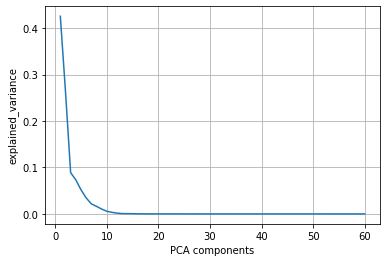

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(60)
x_low = pca.fit_transform(X)
x_low.shape

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

new = [i+1 for i in range(len(explained_variance))]
new2 = [i+2 for i in range(len(explained_variance))]

plot.plot(new,explained_variance)
plot.xlabel('PCA components')
plot.ylabel('explained_variance')
plot.grid(True)
#plot.show()

In [ ]:
# now we can just take 13 PCA components and carry on other processings - dimention reduction
pca = PCA(13)
x_data = pca.fit_transform(X)
x_data.shape # x_data is our new training dataset

(1157, 13)

In [ ]:
#print(our_targets_1deriv[:0])
# five true labels
y = []
for i in range(5):
  y.append (our_targets_1deriv.iloc[:, i])

#y_ca = our_targets_1deriv.iloc[:, 0]
#y_p = our_targets_1deriv.iloc[:, 1]
#y_pH = our_targets_1deriv.iloc[:, 2]
#y_SOC = our_targets_1deriv.iloc[:, 3]
#y_Sand = our_targets_1deriv.iloc[:, 4]


**Random Forest test for PCA And to see the maximum score**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
# using multiple estimators
est = np.arange(10,200,10)


def random_forest(x_data, y):
  global est
  # splitting the dataset
  x_train, x_val, y_train, y_val = train_test_split(x_data, y, test_size = 0.1, random_state = 5)

  # scale the data to be in a range
  scalar = StandardScaler()
  scalar.fit(x_train)
  x_train = scalar.transform(x_train)
  x_val = scalar.transform(x_val)

  # training
  model1 = RandomForestRegressor()
  model1.fit(x_train, y_train)

  
  scores = []
  for e in est:
    model1.set_params(n_estimators = e)
    model1.fit(x_train, y_train)
    # calculate the test accuracy
    scores.append(model1.score(x_val, y_val))

  return scores, model1

# score is accuracy score ------------
scores_collect = []
model_collect = []

for i in range(5):
  s, m = random_forest(x_data, y[i])
  scores_collect.append(s)
  model_collect.append(m)





In [ ]:
#print(len(scores_collect), len(model_collect))
# select the model which returns max scores
final_model = [] # all best models are stored in this list [Ca, P, pH, SOC, Sand]

id = ["Ca", "P", "pH", "SOC", "Sand"]
for i in range(len(scores_collect)):
  #print(scores_collect[i])
  max_score = max(scores_collect[i])
  #index_max_score = scores_collect[i].index(max_score)
  print(f'{id[i]} max score is {max_score}.')
  #final_model.append(model_collect[i][index_max_score])


Ca max score is 0.9057419618748739.
P max score is 0.2150111745133224.
pH max score is 0.7542581017508307.
SOC max score is 0.8293503350018004.
Sand max score is 0.8725099282665307.


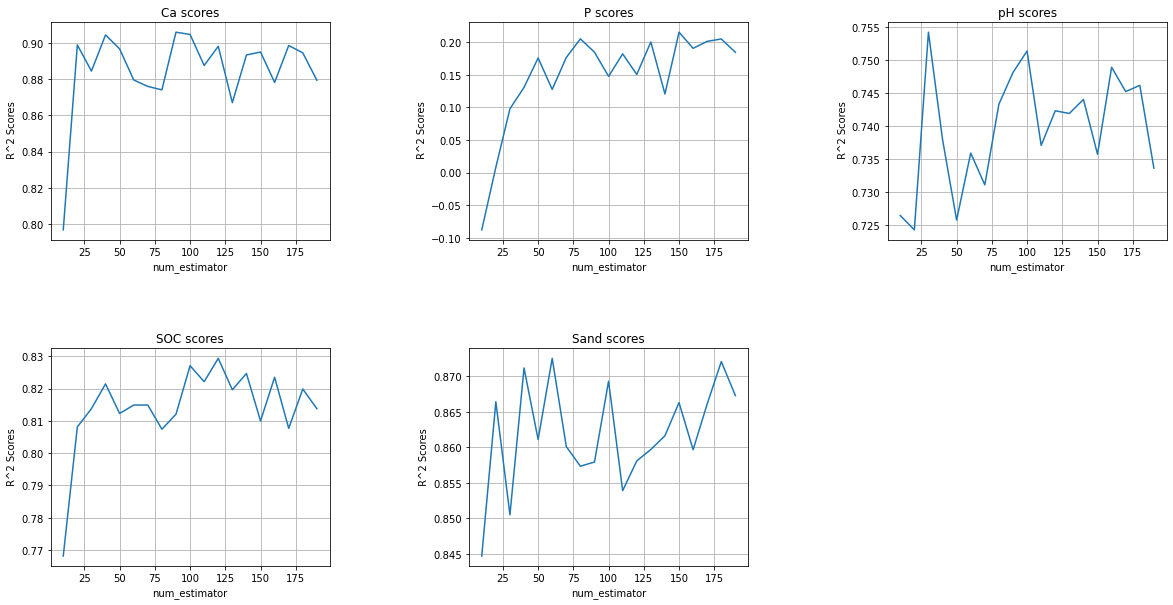

In [ ]:
fig, a = plot.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5, wspace = 0.5)


a[0,0].plot(est, scores_collect[0])
a[0,0].set_title("Ca scores")
a[0,0].grid()
a[0,1].plot(est, scores_collect[1])
a[0,1].set_title("P scores")
a[0,1].grid()
a[0,2].plot(est, scores_collect[2])
a[0,2].set_title("pH scores")
a[0,2].grid()
a[1,0].plot(est, scores_collect[3])
a[1,0].set_title("SOC scores")
a[1,0].grid()
a[1,1].plot(est, scores_collect[4])
a[1,1].set_title("Sand scores")
a[1,1].grid()

fig.delaxes(a[1][2])

for axis in a.flat:
  axis.set(xlabel = 'num_estimator', ylabel=' R^2 Scores')

 
#  pick the estimator with max score from the figure

# SVM and random forest score and MSE using PCA

In [ ]:
score_r_collect5, mse_r_collect5, model_r_collect5 = [], [], []
chemical = ["Ca", "P", "pH", "SOC", "Sand"]
for i in range(5): # [Ca, P, pH, SOC, Sand]
  score_r, mse_r, model_r = Svr_func(x_data, y[i])
  score_r_collect5.append(score_r)
  mse_r_collect5.append(mse_r)
  model_r_collect5.append(model_r)
  print(f'{chemical[i]} score = {score_r}, mse = {mse_r} ')

#print(score_r_collect5)
#print(mse_r_collect5)


SVR(C=1000, gamma=0.1) completed
SVR(C=1000, gamma='auto', kernel='linear') completed
SVR(C=1000, coef0=1, gamma='auto', kernel='poly') completed
RandomForestRegressor() completed
Ca score = [0.761391706019565, 0.22783588415709888, 0.6640622945315189, 0.8028442602575092], mse = [0.3212924242573533, 1.0397395520712451, 0.4523490696357404, 0.26547545569941805] 
SVR(C=1000, gamma=0.1) completed
SVR(C=1000, gamma='auto', kernel='linear') completed
SVR(C=1000, coef0=1, gamma='auto', kernel='poly') completed
RandomForestRegressor() completed
P score = [-0.5095957625990257, -0.08080347924991704, -0.6232138204194255, -0.08559335948507685], mse = [0.8672185714209664, 0.6208899577514804, 0.9324888194117216, 0.6236416037203729] 
SVR(C=1000, gamma=0.1) completed
SVR(C=1000, gamma='auto', kernel='linear') completed
SVR(C=1000, coef0=1, gamma='auto', kernel='poly') completed
RandomForestRegressor() completed
pH score = [0.36575250620875066, 0.46428748046401236, 0.11881394078104135, 0.738436736175048

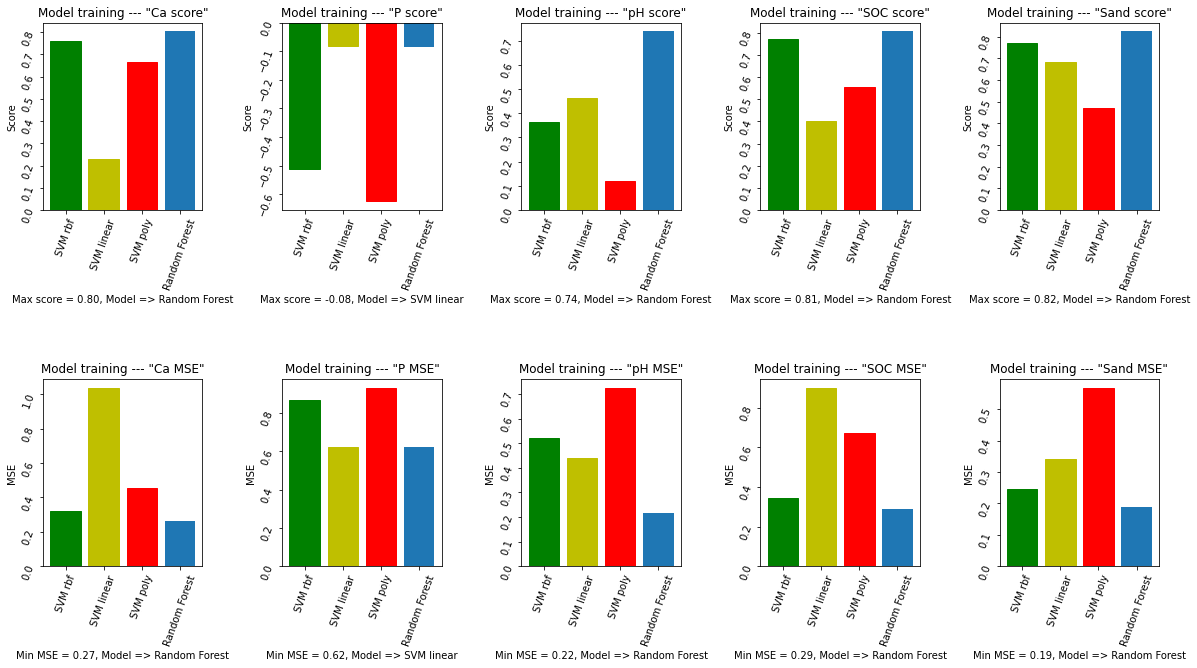

In [ ]:
import matplotlib.pyplot as plt

#========== plot score ================
chemical = ["Ca", "P", "pH", "SOC", "Sand"]

fig, b = plt.subplots(2,5, figsize=(20,10))
fig.subplots_adjust(hspace=0.9, wspace = 0.5)
x = ["SVM rbf", "SVM linear", "SVM poly" ,"Random Forest"]
for i in range(5):
  max_score = max(score_r_collect5[i])
  idx_max_score = score_r_collect5[i].index(max_score)
  low_mse =  min(mse_r_collect5[i])
  idx_low_mse = mse_r_collect5[i].index(low_mse)

  b_first = b[0,i].bar(x, score_r_collect5[i])
  b_first[0].set_color('g')
  b_first[1].set_color('y')
  b_first[2].set_color('r')
  b[0,i].tick_params(labelrotation=70)

  b[0,i].set_xlabel(f'Max score = {max_score:.2f}, Model => {x[idx_max_score]}')
  b[0,i].set_ylabel("Score")
  b[0,i].set_title(f'Model training --- "{chemical[i]} score"')
  #----------------------------------------------------
  b_second = b[1,i].bar(x, mse_r_collect5[i])
  b_second[0].set_color('g')
  b_second[1].set_color('y')
  b_second[2].set_color('r')
  b[1,i].tick_params(labelrotation=70)
  b[1,i].set_xlabel(f'Min MSE = {low_mse:.2f}, Model => {x[idx_low_mse]}')
  b[1,i].set_ylabel("MSE")
  b[1,i].set_title(f'Model training --- "{chemical[i]} MSE"')
